In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
os.chdir("C:\\Data Science\\AQI-Project-master\\AQI-Project-master\\Data\\Real-Data\\")

In [37]:
air_data = pd.read_csv("Real_Combine.csv")
air_data.head()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4,219.720833
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1,182.187500
2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1,154.037500
3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6,223.208333
4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2,200.645833


In [38]:
air_data.shape

(1093, 9)

In [39]:
air_data.columns

Index(['T', 'TM', 'Tm', 'SLP', 'H', 'VV', 'V', 'VM', 'PM 2.5'], dtype='object')

In [40]:
air_data.describe()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
count,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1092.000000
mean,26.009241,32.482251,19.460201,1008.081885,62.918573,2.003111,6.751510,15.805124,109.090984
std,7.237401,6.679078,7.438653,7.529237,15.709816,0.747541,3.841137,7.308435,84.465790
min,6.700000,9.800000,0.000000,991.500000,20.000000,0.300000,0.400000,1.900000,0.000000
25%,19.300000,27.800000,12.100000,1001.100000,54.000000,1.600000,3.700000,11.100000,41.833333
50%,28.200000,34.200000,21.200000,1008.100000,64.000000,1.900000,6.500000,14.800000,83.458333
75%,31.700000,37.000000,26.000000,1015.000000,74.000000,2.600000,9.100000,18.300000,158.291667
max,38.500000,45.500000,32.700000,1023.200000,98.000000,5.800000,24.400000,57.600000,404.500000


In [41]:
#Checking the null values in the data set
air_data.isnull().sum()

T         0
TM        0
Tm        0
SLP       0
H         0
VV        0
V         0
VM        0
PM 2.5    1
dtype: int64

In [42]:
#Removing the null values
air_data = air_data.dropna()

In [43]:
air_data.isnull().sum()

T         0
TM        0
Tm        0
SLP       0
H         0
VV        0
V         0
VM        0
PM 2.5    0
dtype: int64

In [44]:
#Creating the X and y Variable
X = air_data[['T', 'TM', 'Tm', 'SLP', 'H', 'VV', 'V', 'VM']] #X = air_data[:,:-1].values
y = air_data['PM 2.5'] # y = air_data[:,-1]

In [45]:
X.head()

,T,TM,Tm,SLP,H,VV,V,VM
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1
2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1
3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6
4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2


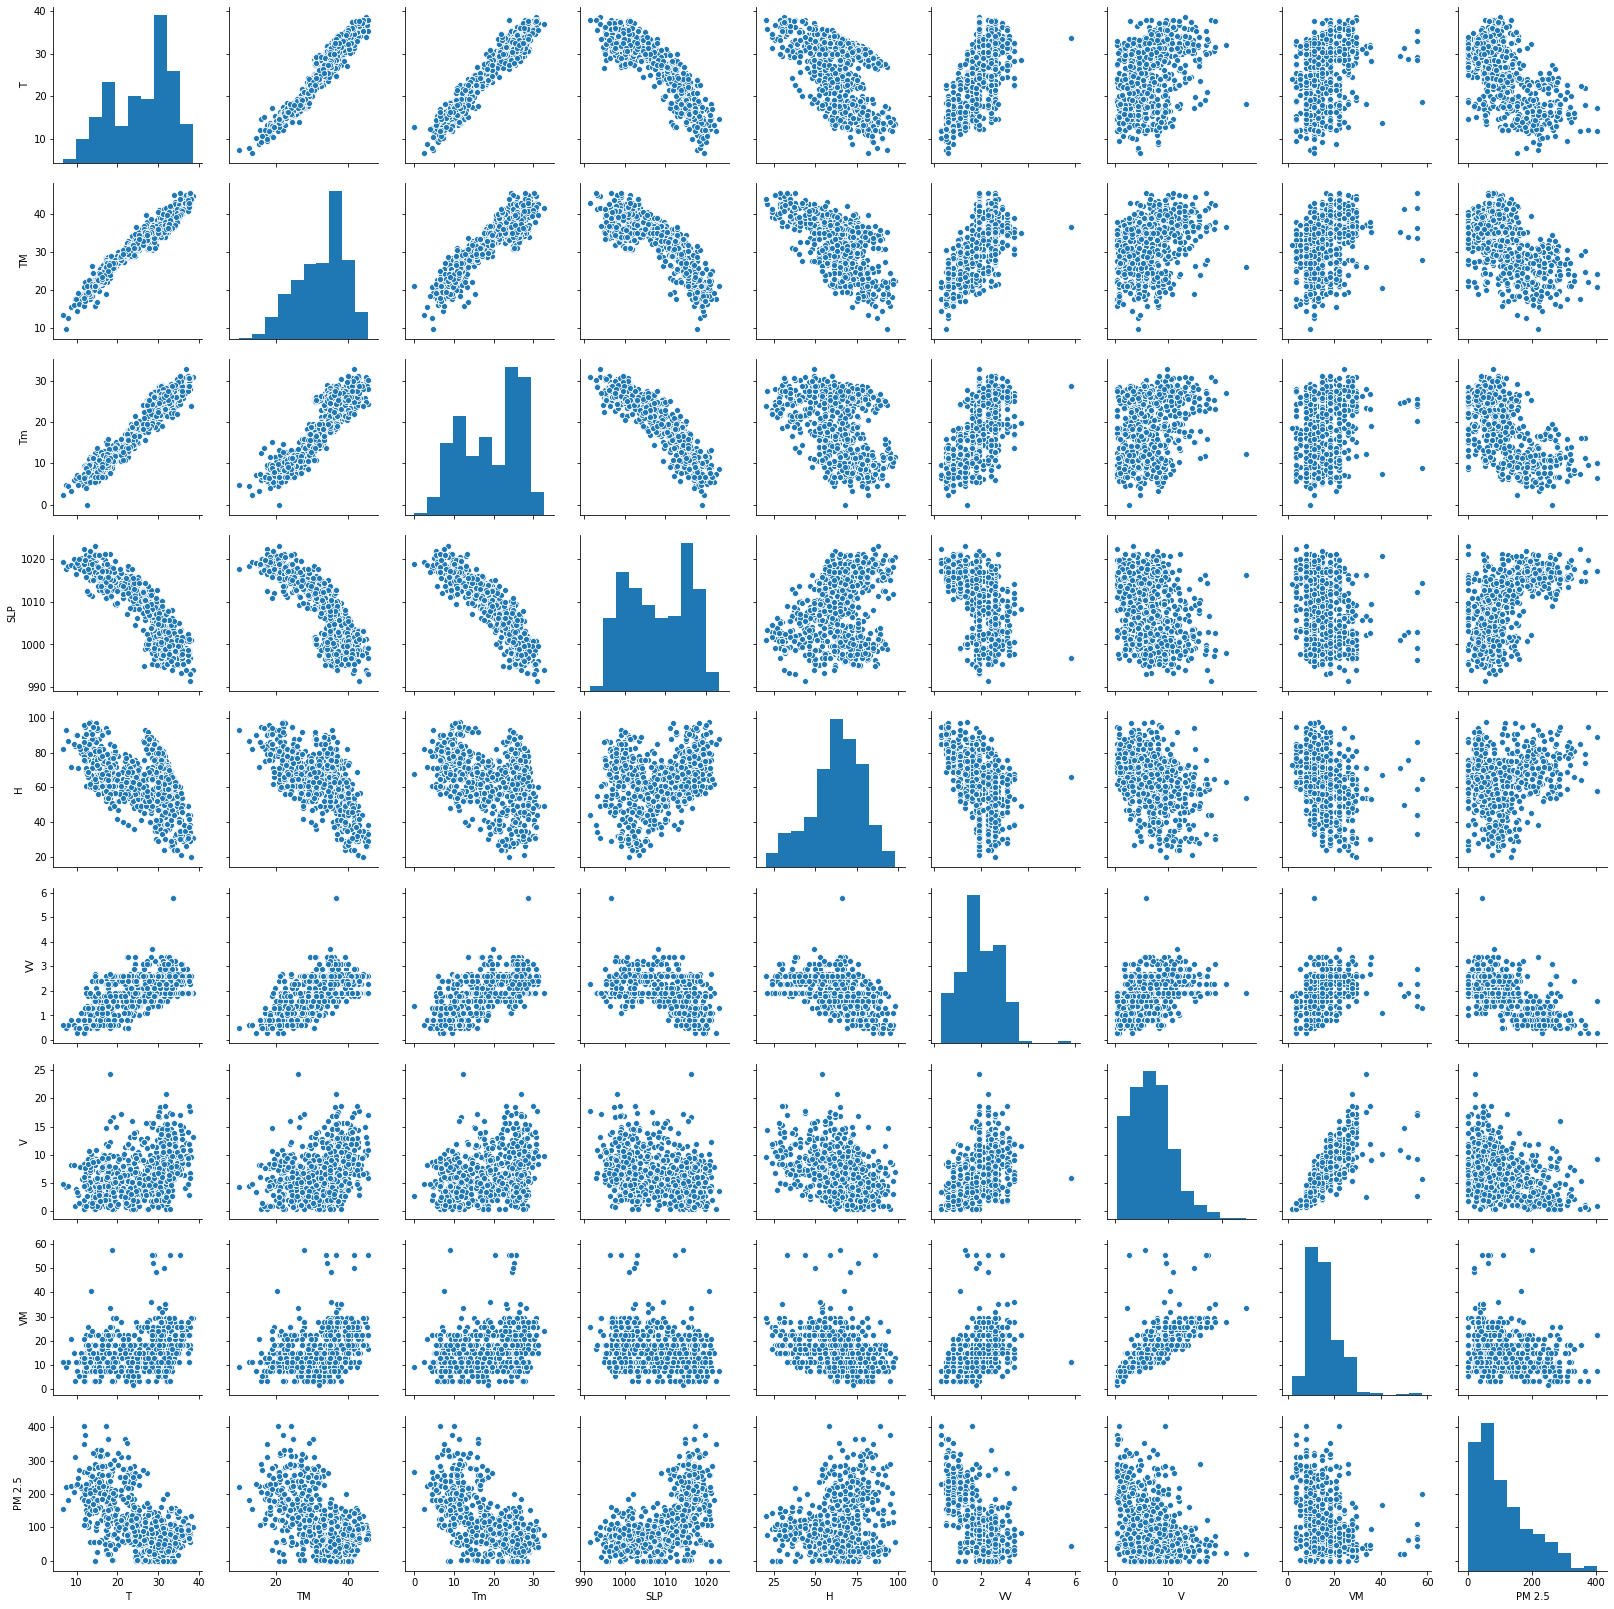

In [46]:
sns.pairplot(air_data)

In [47]:
#Correlation of the variables
air_data.corr()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
T,1.000000,0.967536,0.953719,-0.881409,-0.509299,0.640792,0.301994,0.287738,-0.631462
TM,0.967536,1.000000,0.892031,-0.822958,-0.586681,0.606945,0.292949,0.297011,-0.568409
Tm,0.953719,0.892031,1.000000,-0.917518,-0.287357,0.577240,0.296225,0.266782,-0.673824
SLP,-0.881409,-0.822958,-0.917518,1.000000,0.240256,-0.517915,-0.329838,-0.310704,0.623187
H,-0.509299,-0.586681,-0.287357,0.240256,1.000000,-0.465374,-0.380575,-0.362177,0.138005
VV,0.640792,0.606945,0.577240,-0.517915,-0.465374,1.000000,0.376873,0.342442,-0.573941
V,0.301994,0.292949,0.296225,-0.329838,-0.380575,0.376873,1.000000,0.775655,-0.268530
VM,0.287738,0.297011,0.266782,-0.310704,-0.362177,0.342442,0.775655,1.000000,-0.215854
PM 2.5,-0.631462,-0.568409,-0.673824,0.623187,0.138005,-0.573941,-0.268530,-0.215854,1.000000


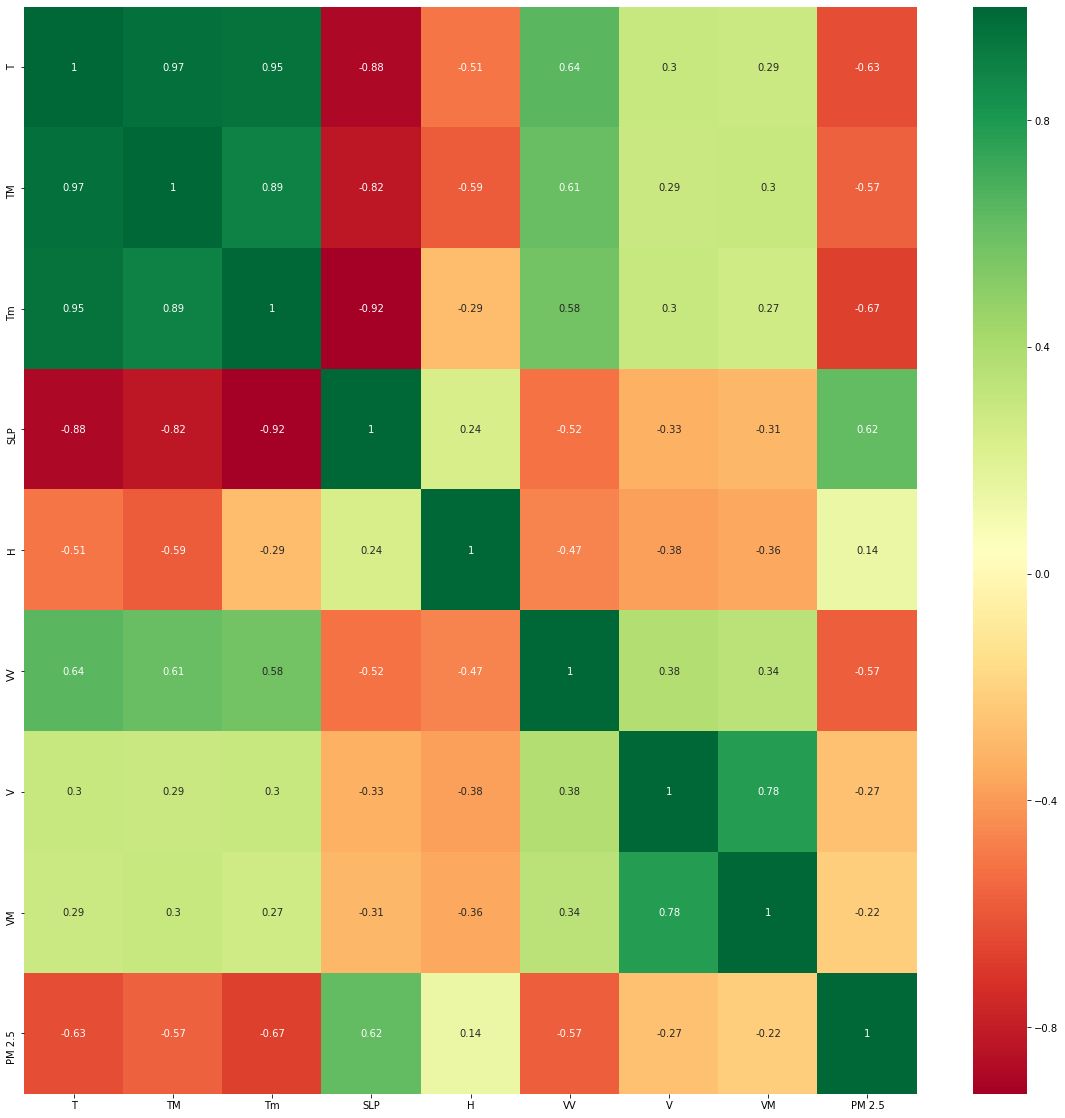

In [48]:
#Get the correlations of each features in the dataset
corrmat = air_data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))

#Plotting the heatmap using the sns library
g = sns.heatmap(air_data[top_corr_features].corr(),annot= True, cmap = "RdYlGn")

In [49]:
corrmat.index

Index(['T', 'TM', 'Tm', 'SLP', 'H', 'VV', 'V', 'VM', 'PM 2.5'], dtype='object')

In [51]:
#feature importance of each feature of your dataset by using the feature importance property of the model
#Featre importance gives a score for each feature of your data, the higher the score more important or more relevant is the
#feature towards your output variable
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)

C:\Users\n.sharnappa.madem\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
                    max_features='auto', max_leaf_nodes=None,
                    min_impurity_decrease=0.0, min_impurity_split=None,
                    min_samples_leaf=1, min_samples_split=2,
                    min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
                    oob_score=False, random_state=None, verbose=0,
                    warm_start=False)

In [55]:
X.head()

,T,TM,Tm,SLP,H,VV,V,VM
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1
2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1
3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6
4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2


In [56]:
print(model.feature_importances_)

[0.18729091 0.08723184 0.18175174 0.18446007 0.09015576 0.17238812
 0.05597135 0.04075021]


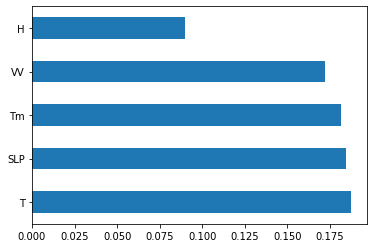

In [57]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

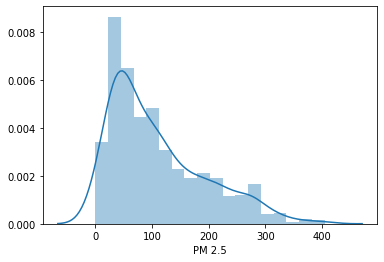

In [58]:
sns.distplot(y)

In [62]:
#Splitting the model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size = 0.7, test_size = 0.3, random_state =100)

In [64]:
import statsmodels.api as sm
X_train = sm.add_constant(X_train)
lm = sm.OLS(y_train,X_train).fit()

C:\Users\n.sharnappa.madem\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [66]:
#Summary of first model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                 PM 2.5   R-squared:                       0.528
Model:                            OLS   Adj. R-squared:                  0.523
Method:                 Least Squares   F-statistic:                     105.4
Date:                Sun, 12 Jan 2020   Prob (F-statistic):          1.40e-117
Time:                        23:05:43   Log-Likelihood:                -4173.0
No. Observations:                 764   AIC:                             8364.
Df Residuals:                     755   BIC:                             8406.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        109.2614    762.195      0.143      0.8

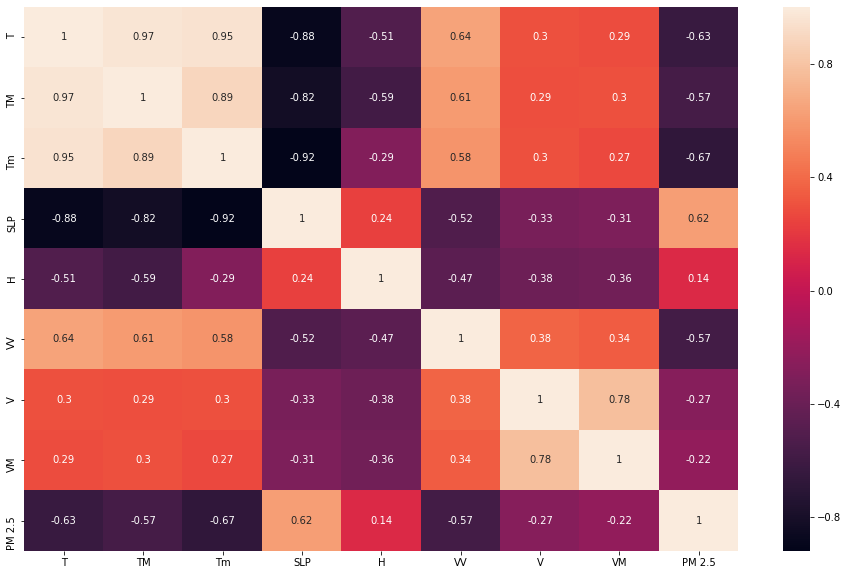

In [67]:
# Let's see the correlation matrix 
plt.figure(figsize = (16,10))     # Size of the figure
sns.heatmap(air_data.corr(),annot = True)

In [68]:
#dropping the VM variable from X_train
X_train = X_train.drop('VM',1)
X_train.head()

,const,T,TM,Tm,SLP,H,VV,V
682,1.0,32.5,37.2,25.3,1003.0,59.0,3.1,1.7
859,1.0,31.3,35.0,26.0,1004.6,63.0,3.2,11.5
841,1.0,30.9,35.0,26.0,997.4,73.0,2.6,6.5
460,1.0,32.7,38.0,27.0,996.9,56.0,1.9,14.1
432,1.0,30.9,38.9,21.7,1006.7,44.0,2.7,3.0


In [70]:
#Creating the secound model
lm_1 = sm.OLS(y_train,X_train).fit()
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                 PM 2.5   R-squared:                       0.527
Model:                            OLS   Adj. R-squared:                  0.523
Method:                 Least Squares   F-statistic:                     120.5
Date:                Sun, 12 Jan 2020   Prob (F-statistic):          1.56e-118
Time:                        23:09:05   Log-Likelihood:                -4173.3
No. Observations:                 764   AIC:                             8363.
Df Residuals:                     756   BIC:                             8400.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        149.5426    759.696      0.197      0.8

In [71]:
#dropping the SLP variable
X_train = X_train.drop('SLP',1)
X_train.head()

,const,T,TM,Tm,H,VV,V
682,1.0,32.5,37.2,25.3,59.0,3.1,1.7
859,1.0,31.3,35.0,26.0,63.0,3.2,11.5
841,1.0,30.9,35.0,26.0,73.0,2.6,6.5
460,1.0,32.7,38.0,27.0,56.0,1.9,14.1
432,1.0,30.9,38.9,21.7,44.0,2.7,3.0


In [72]:
#Creating the model 3
lm_2 = sm.OLS(y_train,X_train).fit()
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                 PM 2.5   R-squared:                       0.527
Model:                            OLS   Adj. R-squared:                  0.524
Method:                 Least Squares   F-statistic:                     140.8
Date:                Sun, 12 Jan 2020   Prob (F-statistic):          1.32e-119
Time:                        23:10:45   Log-Likelihood:                -4173.3
No. Observations:                 764   AIC:                             8361.
Df Residuals:                     757   BIC:                             8393.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        384.2542     38.822      9.898      0.0

In [80]:
X_test.head()

,const,T,TM,Tm,H,VV,V
922,1.0,11.9,15.7,7.5,86.0,0.8,6.1
896,1.0,21.4,29.6,12.7,40.0,2.6,8.0
156,1.0,22.4,28.6,16.3,67.0,1.0,5.4
651,1.0,31.0,35.2,26.0,80.0,2.4,7.2
468,1.0,31.1,35.6,26.4,73.0,1.9,10.9


In [81]:
#Adding the constant value in X_test dataset
X_test = sm.add_constant(X_test)
X_test.head()

,const,T,TM,Tm,H,VV,V
922,1.0,11.9,15.7,7.5,86.0,0.8,6.1
896,1.0,21.4,29.6,12.7,40.0,2.6,8.0
156,1.0,22.4,28.6,16.3,67.0,1.0,5.4
651,1.0,31.0,35.2,26.0,80.0,2.4,7.2
468,1.0,31.1,35.6,26.4,73.0,1.9,10.9


In [86]:
y_pred = lm_2.predict(X_test)

Text(0, 0.5, 'y_pred')

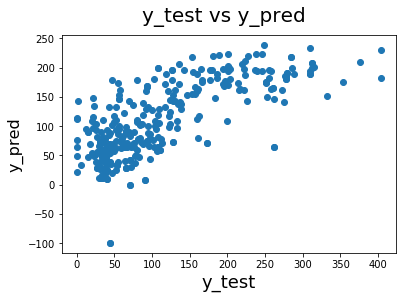

In [88]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                   

In [91]:
import numpy as np
from sklearn import metrics
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

RMSE : 59.31456226849069


In [96]:
#The above model is contains 59 % which is very low accuracy so Creating the Ridge Regression model
#Ridge regression
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [98]:
ridge = Ridge()
parameters = {'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X,y)

C:\Users\n.sharnappa.madem\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [99]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 40}
-3663.335114590357


In [100]:
#Implemting the Lasso Regression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

In [101]:
lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)

lasso_regressor.fit(X,y)
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

C:\Users\n.sharnappa.madem\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1444197.3511959247, tolerance: 614.5592033746461
  positive)
C:\Users\n.sharnappa.madem\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1568739.7813254024, tolerance: 678.9710639134809
  positive)
C:\Users\n.sharnappa.madem\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1456481.2227170018, tolerance: 626.8737580831347
  positive)
C:\Users\n.sharnappa.madem\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_

{'alpha': 1}
-3665.6636891108824


C:\Users\n.sharnappa.madem\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [105]:
#Model Evaluation
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


In [106]:
prediction=lasso_regressor.predict(X_test)

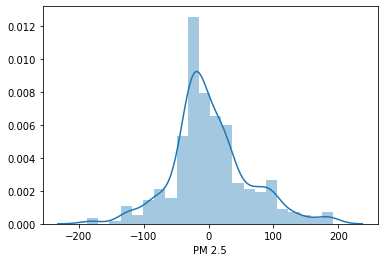

In [107]:
sns.distplot(y_test-prediction)

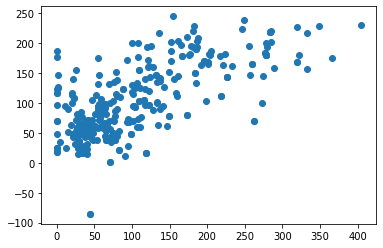

In [108]:
plt.scatter(y_test,prediction)

In [109]:
from sklearn import metrics

In [111]:
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test,prediction))
print("Mean Squared Error:", metrics.mean_squared_error(y_test,prediction))
print("Rot Mean Squared Error:", np.sqrt(metrics.mean_squared_error(y_test,prediction)))

Mean Absolute Error: 44.50831198875126
Mean Squared Error: 3627.8109390424697
Rot Mean Squared Error: 60.2313119485411


In [112]:
import pickle 

In [113]:
# open a file, where you ant to store the data
file = open('lasso_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(lasso_regressor, file)